#**NHẬP THƯ VIỆN**

In [ ]:
import sys
import pandas as pd
import numpy as np
from PIL import Image

from io import BytesIO


#**TẢI DỮ LIỆU**



In [ ]:
#Đọc dữ liệu
df = pd.read_excel('extra_adidas_nikes_products_public_data.xlsx')

In [ ]:
# 5 giá trị đầu tiên của dataframe
df.head(5)

,Unnamed: 0,name,price,description,review_count,avg_rating,scraped_at,color,brand,currency,url,availability,images
0,2572,Adilette Comfort Slides,32.00,Classic sport sandals with a lightweight feel....,11534.0,4.7,12/13/2023 20:47,Core Black / Cloud White / Cloud White,Adidas,USD,https://www.adidas.com/us/adilette-comfort-sli...,INSTOCK,"['https://assets.adidas.com/images/w_600,f_aut..."
1,52,Nike Sportswear Swoosh Puffer PrimaLoft®,225.97,Stay warm on the coldest days by bundling up i...,18.0,"4,4",2023-12-13,White/Black,Nike,USD,https://www.nike.com/t/sportswear-swoosh-puffe...,InStock,https://static.nike.com/a/images/t_default/e5c...
2,500,Jordan Artist Series by Jordan Moss,66.97,Jordan Moss is a Brooklyn based illustrator an...,0.0,0,2023-12-14,Dark Driftwood,Nike,USD,https://www.nike.com/t/jordan-artist-series-by...,InStock,https://static.nike.com/a/images/t_default/u_1...
3,622,X_PLRPHASE Shoes Kids,80.00,Comfortable sneakers made in part with recycle...,53.0,4.6,12/14/2023 0:17,Cloud White / Magic Grey Met / Bliss Lilac,Adidas,USD,https://www.adidas.com/us/x_plrphase-shoes-kid...,INSTOCK,"['https://assets.adidas.com/images/w_600,f_aut..."
4,1681,Gazelle Bold Shoes,120.00,A platform shoe that adds modern looks to an i...,408.0,4.6,12/13/2023 19:45,Cloud White / Cloud White / Cloud White,Adidas,USD,https://www.adidas.com/us/gazelle-bold-shoes/I...,INSTOCK,"['https://assets.adidas.com/images/w_600,f_aut..."


In [ ]:
#Thông tin tổng quát Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6272 non-null   int64  
 1   name          6209 non-null   object 
 2   price         6075 non-null   float64
 3   description   6047 non-null   object 
 4   review_count  5541 non-null   float64
 5   avg_rating    5541 non-null   object 
 6   scraped_at    6272 non-null   object 
 7   color         6075 non-null   object 
 8   brand         6272 non-null   object 
 9   currency      6272 non-null   object 
 10  url           6272 non-null   object 
 11  availability  6272 non-null   object 
 12  images        6219 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 637.1+ KB


In [ ]:
#Các cột của dataframe
df.columns

Index(['Unnamed: 0', 'name', 'price', 'description', 'review_count',
       'avg_rating', 'scraped_at', 'color', 'brand', 'currency', 'url',
       'availability', 'images'],
      dtype='object')

In [ ]:
#Đổi tên cột Unnamed thành ID
df.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)

In [ ]:
#Gom 2 cột "color" và "description" lại thành 1 thuộc tính
df['description'] = 'Color of product: ' + df['color'].astype(str) + '. ' + df['description']

In [ ]:
df['description'][0]

'Color of product: Core Black / Cloud White / Cloud White. Classic sport sandals with a lightweight feel.The Adilette has been a favorite of beachgoers and poolside loungers since 1972. An embossed adidas Badge of Sport print on the soft bandage upper gives this version of the iconic slides a sporty feel. The contoured footbed delivers the stability the slides are famous for.'

In [ ]:
# Bỏ bớt các cột không cần thiết
df = df.drop(columns=['price', 'review_count', 'avg_rating', 'scraped_at', 'color', 'brand', 'currency', 'availability'])

In [ ]:
df.head(5)

,ID,name,description,url,images
0,2572,Adilette Comfort Slides,Color of product: Core Black / Cloud White / C...,https://www.adidas.com/us/adilette-comfort-sli...,"['https://assets.adidas.com/images/w_600,f_aut..."
1,52,Nike Sportswear Swoosh Puffer PrimaLoft®,Color of product: White/Black. Stay warm on th...,https://www.nike.com/t/sportswear-swoosh-puffe...,https://static.nike.com/a/images/t_default/e5c...
2,500,Jordan Artist Series by Jordan Moss,Color of product: Dark Driftwood. Jordan Moss ...,https://www.nike.com/t/jordan-artist-series-by...,https://static.nike.com/a/images/t_default/u_1...
3,622,X_PLRPHASE Shoes Kids,Color of product: Cloud White / Magic Grey Met...,https://www.adidas.com/us/x_plrphase-shoes-kid...,"['https://assets.adidas.com/images/w_600,f_aut..."
4,1681,Gazelle Bold Shoes,Color of product: Cloud White / Cloud White / ...,https://www.adidas.com/us/gazelle-bold-shoes/I...,"['https://assets.adidas.com/images/w_600,f_aut..."


#**TIỀN XỬ LÝ DỮ LIỆU**

In [ ]:
#Bỏ các dòng có giá trị null trong Dataframe
df = df.dropna()

#Bỏ các dòng trùng lặp
df = df.drop_duplicates()

In [ ]:
#Kiểm tra còn giá trị null trong dataframe hay không
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5918 entries, 0 to 6271
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           5918 non-null   int64 
 1   name         5918 non-null   object
 2   description  5918 non-null   object
 3   url          5918 non-null   object
 4   images       5918 non-null   object
dtypes: int64(1), object(4)
memory usage: 277.4+ KB


In [ ]:
#Kiểm tra xem có giá trị trùng lặp hay không
check_duplicates = lambda df: df[df.duplicated()]

duplicates = check_duplicates(df)

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates in:")
    print(duplicates)

No duplicates found.


##**TEXT PROCESSCING**

In [ ]:
df['description'][0]

'Color of product: Core Black / Cloud White / Cloud White. Classic sport sandals with a lightweight feel.The Adilette has been a favorite of beachgoers and poolside loungers since 1972. An embossed adidas Badge of Sport print on the soft bandage upper gives this version of the iconic slides a sporty feel. The contoured footbed delivers the stability the slides are famous for.'

###**Nhập thư viện xử lý văn bản**

In [ ]:
import re
#Thư viện xử lý ngôn ngữ tự nhiên (Natural Language Tool )
import nltk

#Modul thực hiện việc đưa từ về dạng gốc (vd: beautiful -> beauti)
from nltk.stem import WordNetLemmatizer

#l chứa các từ dừng
from nltk.corpus import stopwords

#Modul để tách câu và tách từ
from nltk.tokenize import sent_tokenize, word_tokenize

###**Tải các dữ liệu cần dùng từ thư viện nltk**

In [ ]:
#Dữ liệu cho việc tokenization (tách câu,từ)
nltk.download('punkt')
#Từ điển ngôn ngữ Anh
nltk.download('wordnet')
#Danh sách các từ dừng
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Chuyển đổi các từ viết tắt trong văn bản thành từ đầy đủ
con_appos = {
    "rep": "represent",
    "hoodie": "hooded sweatshirt",
    "tee": "t-shirt",
    "zip": "zip-up",
    "maxi": "maxi dress",
    "mini": "mini dress",
    "midi": "midi dress",
    "denim": "denim fabric",
    "chino": "chino pants",
    "cropped": "cropped length",
    "floral": "floral print",
    "striped": "striped pattern",
    "polka": "polka dot",
    "v-neck": "v-neckline",
    "crew-neck": "crew neckline",
    "slim": "slim fit",
    "loose": "loose fit",
    "bootcut": "bootcut style",
    "skinny": "skinny fit",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "we're": "we are",
    "to've": "to have"
}

In [ ]:
def preprocessed_description(text):
    #Chuyển đổi đầu vào là dạng văn bản
    text = str(text)

    #Chuyển văn bản thành chữ viết thường
    text = text.lower()

    #Chuyển từ viết tắt thành từ đầu đủ
    pattern = re.compile(r'\b(' + r'|'.join(con_appos.keys()) + r')\b')
    text = pattern.sub(lambda x: con_appos[x.group()], text)

    #Xóa kí tự đặc biệt và số
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d+', ' ', text)

    #Xóa thẻ HTML đính kèm
    Tag_re = re.compile(r'<[^>]+>')
    text  = Tag_re.sub(' ', text)

    #Xóa khoảng trống thừa
    text = re.sub(r'\s+', ' ', text)

    #Xóa từ dừng
    stopwords_list = [word for word in stopwords.words('english') if word != 'not']
    pattern = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*')
    text = pattern.sub('', text)

    #Đưa từ về dạng nghĩa gốc
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text))

    return text

In [ ]:
#Trước khi xử lý
df['description'][0]

'Color of product: Core Black / Cloud White / Cloud White. Classic sport sandals with a lightweight feel.The Adilette has been a favorite of beachgoers and poolside loungers since 1972. An embossed adidas Badge of Sport print on the soft bandage upper gives this version of the iconic slides a sporty feel. The contoured footbed delivers the stability the slides are famous for.'

In [ ]:
#Áp dụng lên cột 'description'
df['description'] = df['description'].apply(preprocessed_description)

In [ ]:
#Sau xử lý
df['description'][0]

'color product core black cloud white cloud white classic sport sandal lightweight feel adilette favorite beachgoers poolside lounger since embossed adidas badge sport print soft bandage upper give version iconic slide sporty feel contoured footbed delivers stability slide famous'

##**Tiền xử lý hình ảnh**



In [ ]:
import ast

def convert_to_list(link_str):
    try:
        # Check if the link_str contains "~" delimiter
        if "~" in link_str:
            link_list = link_str.split("~")
        else:
            # Convert the string representation of a list to an actual list
            link_list = ast.literal_eval(link_str)

        # Strip whitespaces around each link
        return [link.strip() for link in link_list]
    except (SyntaxError, ValueError):
        print(f"Error converting {link_str} to a list")
        return None

In [ ]:
df['images'] = df['images'].apply(lambda x: convert_to_list(x))

In [ ]:
#Xóa các giá trị NA trong cột 'images'
df = df.dropna(subset=['images'])

In [ ]:
#Lọc các URL hợp lệ
def filter_invalid_urls(image_urls):

    valid_urls = [url for url in image_urls if 'data:image' not in url]
    return valid_urls

#Áp dụng
df['images'] = df['images'].apply(filter_invalid_urls)

In [ ]:
import concurrent.futures
import requests

def is_valid_url(url):
    try:
        # Kiểm tra xem URL có bắt đầu bằng giao thức hợp lệ hay không
        if url.startswith(('http://', 'https://')):
            # Kiểm tra xem URL có thể truy cập được không (status code 200)
            response = requests.head(url, timeout=1)  # Thiết lập thời gian đợi
            return response.status_code == 200
        else:
            # In thông báo lỗi nếu định dạng URL không hợp lệ
            print(f"Định dạng URL không hợp lệ: {url}")
            return False
    except requests.RequestException as e:
        # In thông báo lỗi nếu có ngoại lệ xảy ra trong quá trình kiểm tra URL
        print(f"Lỗi khi kiểm tra {url}: {e}")
        return False

def filter_valid_urls(image_urls):
    # Danh sách để lưu trữ các URL hợp lệ
    valid_urls = []

    # Định nghĩa hàm kiểm tra tính hợp lệ của URL
    def check_url(url):
        if is_valid_url(url):
            # Nếu URL hợp lệ, thêm vào danh sách các URL hợp lệ
            valid_urls.append(url)

    # Sử dụng ThreadPoolExecutor để kiểm tra URL đồng thời
    with concurrent.futures.ThreadPoolExecutor() as executor:
        # Áp dụng hàm check_url cho từng URL một cách đồng thời
        executor.map(check_url, image_urls)

    # Trả về danh sách các URL hình ảnh hợp lệ
    return valid_urls

# Ví dụ sử dụng:
# Áp dụng hàm filter_valid_urls cho cột 'images' trong DataFrame
df['images'] = df['images'].apply(filter_valid_urls)


In [ ]:
df['images'].iloc[0]

['https://assets.adidas.com/images/w_600,f_auto,q_auto/9178d78dec7f4fc7bfc6acb800b460f8_9366/Adilette_Comfort_Slides_Black_GV9735_01_standard.jpg',
 'https://assets.adidas.com/images/w_600,f_auto,q_auto/aa391624f3f04f6c9555acb800b46d8d_9366/Adilette_Comfort_Slides_Black_GV9735_02_standard_hover.jpg',
 'https://assets.adidas.com/images/w_600,f_auto,q_auto/a450f1abe935405582c0acb800b474af_9366/Adilette_Comfort_Slides_Black_GV9735_03_standard.jpg',
 'https://assets.adidas.com/images/w_600,f_auto,q_auto/958637c0f4c44a75833eacb800b47bc4_9366/Adilette_Comfort_Slides_Black_GV9735_04_standard.jpg']

#Model FashionClip


##Cài đặt model

In [ ]:
%%capture
!pip install -U fashion-clip

In [ ]:
from fashion_clip.fashion_clip import FashionCLIP

In [ ]:
%%capture
fclip = FashionCLIP('fashion-clip')

##Xử lý

In [ ]:
#Lấy danh sách URL hình ảnh từ cột 'images' của DataFrame:
image_urls_list = df['images'].tolist()

#Tạo danh sách chứa tất cả các URL hình ảnh:
images = []
for image_urls in image_urls_list:
    images.extend(image_urls)

#Lấy danh sách mô tả văn bản từ cột 'description' của DataFrame:
texts = df['description'].tolist()

#Tạo embeddings cho hình ảnh và văn bản mô tả
image_embeddings = fclip.encode_images(images, batch_size=32)
text_embeddings = fclip.encode_text(texts, batch_size=32)

#Chuẩn hóa embeddings về đơn vị norm:(so that we can use dot product instead of cosine similarity to do comparisons)
image_embeddings = image_embeddings / np.linalg.norm(image_embeddings, ord=2, axis=-1, keepdims=True)
text_embeddings = text_embeddings / np.linalg.norm(text_embeddings, ord=2, axis=-1, keepdims=True)

 29%|██▉       | 258/889 [1:10:51<2:53:18, 16.48s/it]
890it [1:17:38,  5.23s/it]


Map:   0%|          | 0/5918 [00:00<?, ? examples/s]

185it [07:53,  2.56s/it]


In [ ]:
import matplotlib.pyplot as plt

def get_top_similar_images(text):
    # Encode text to get text embedding
    text_embedding = fclip.encode_text([text], batch_size=32)[0]

    # Compute similarity scores between text embedding and image embeddings
    similarity_scores = np.dot(text_embedding, image_embeddings.T)

    # Sort the images based on similarity scores in descending order
    sorted_indices = np.argsort(similarity_scores)[::-1]

    # Retrieve the top K most similar image URLs
    top_k = 5  # Number of top similar images to retrieve
    top_similar_image_urls = [images[i] for i in sorted_indices[:top_k]]

    # Create a dictionary with URLs and their corresponding similarity scores
    top_similar_images_info = [{'url': url, 'similarity_score': similarity_scores[i]} for i, url in enumerate(top_similar_image_urls)]

    # Plot the top 5 similar images
    fig, axes = plt.subplots(1, top_k, figsize=(15, 5))

    for i, image_url in enumerate(top_similar_image_urls):
        response = requests.get(image_url)
        image = Image.open(BytesIO(response.content))

        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(f"Score: {similarity_scores[sorted_indices[i]]:.2f}")

    plt.show()
    df_top_similar = df[df['images'].apply(lambda x: any(link in x for link in top_similar_image_urls))]

      # Get the URL and name information of products in top_similar_image_urls
    result_urls = df_top_similar['url'].tolist()
    result_names = df_top_similar['name'].tolist()

# Display the results
    for url, name in zip(result_urls, result_names):
      print(f"Name: {name}\n URL: {url}")
    # Return the top similar image URLs along with their similarity scores

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

1it [00:00,  4.30it/s]


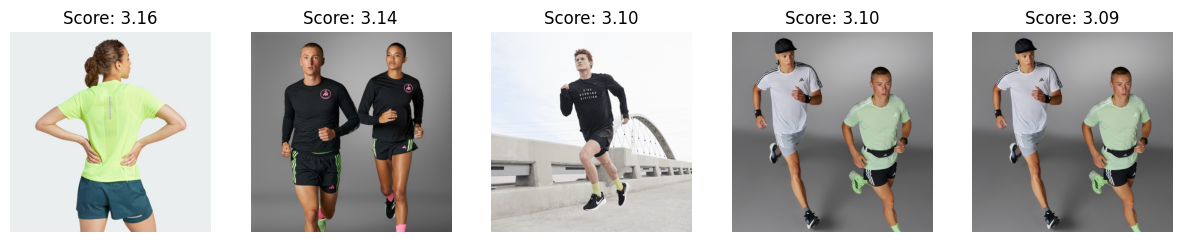

Name: Nike Revolution 7 EasyOn
 URL: https://www.nike.com/t/revolution-7-easyon-mens-road-running-shoes-Wsqj83/FQ4112-001
Name: Own the Run 3-Stripes Shorts
 URL: https://www.adidas.com/us/own-the-run-3-stripes-shorts/IQ3814.html
Name: Own the Run 3-Stripes Tee
 URL: https://www.adidas.com/us/own-the-run-3-stripes-tee/IQ3835.html
Name: Ultimate Knit Tee
 URL: https://www.adidas.com/us/ultimate-knit-tee/IM1863.html
Name: Own the Run adidas Runners Long Sleeve Tee (Gender Neutral)
 URL: https://www.adidas.com/us/own-the-run-adidas-runners-long-sleeve-tee-gender-neutral/IS5408.html


In [ ]:
get_top_similar_images("running  shirt")